### Study the scalability and effectiveness of different regression methods in the domain of traﬀic management.

#### Pitaouli_Eftychia (2022202004019), Kratimenos_Efstathios (2022202004008), Vakouftsis_Athanasios  (2022202004002), Lertas_Giorgos (2022202004010)

In [10]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('flights.csv')

In [12]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [14]:
df.isnull().any()

YEAR                   False
MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME          True
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON     True
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

In [15]:
df.isnull().any().value_counts()

True     18
False    13
dtype: int64

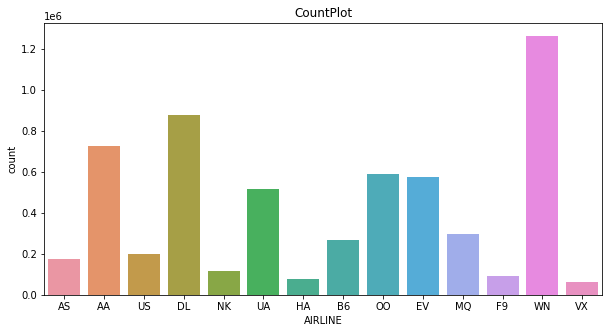

In [16]:
plt.figure(figsize=(10,5))
plt.title("CountPlot")  
sns.countplot(x='AIRLINE',data=df);

In [17]:
#df = df.drop(['Start_Time','End_Time','TMC','Description', 'Number', 'Street', 'City'
 #             'End_Lat', 'End_Lng'], axis=1)

In [18]:
df1=df[['DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_TIME','DEPARTURE_DELAY',
        'ARRIVAL_TIME','ARRIVAL_DELAY']]

In [19]:
df1

,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_TIME,ARRIVAL_DELAY
0,4,AS,ANC,SEA,2354.0,-11.0,408.0,-22.0
1,4,AA,LAX,PBI,2.0,-8.0,741.0,-9.0
2,4,US,SFO,CLT,18.0,-2.0,811.0,5.0
3,4,AA,LAX,MIA,15.0,-5.0,756.0,-9.0
4,4,AS,SEA,ANC,24.0,-1.0,259.0,-21.0
...,...,...,...,...,...,...,...,...
5819074,4,B6,LAX,BOS,2355.0,-4.0,753.0,-26.0
5819075,4,B6,JFK,PSE,2355.0,-4.0,430.0,-16.0
5819076,4,B6,JFK,SJU,2350.0,-9.0,432.0,-8.0
5819077,4,B6,MCO,SJU,2353.0,-6.0,330.0,-10.0


In [20]:
df1.isnull().any()

DAY_OF_WEEK            False
AIRLINE                False
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
dtype: bool

In [21]:
df1.dtypes

DAY_OF_WEEK              int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
df1['AIRLINE']=le.fit_transform(df1['AIRLINE'])

In [24]:
df1['ORIGIN_AIRPORT']=le.fit_transform(df1['ORIGIN_AIRPORT'].astype('str'))
df1

,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_TIME,ARRIVAL_DELAY
0,4,1,323,SEA,2354.0,-11.0,408.0,-22.0
1,4,0,482,PBI,2.0,-8.0,741.0,-9.0
2,4,11,584,CLT,18.0,-2.0,811.0,5.0
3,4,0,482,MIA,15.0,-5.0,756.0,-9.0
4,4,1,583,ANC,24.0,-1.0,259.0,-21.0
...,...,...,...,...,...,...,...,...
5819074,4,2,482,BOS,2355.0,-4.0,753.0,-26.0
5819075,4,2,472,PSE,2355.0,-4.0,430.0,-16.0
5819076,4,2,472,SJU,2350.0,-9.0,432.0,-8.0
5819077,4,2,499,SJU,2353.0,-6.0,330.0,-10.0


In [25]:
df1['DESTINATION_AIRPORT']=le.fit_transform(df1['DESTINATION_AIRPORT'].astype('str'))

In [26]:
df1

,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_TIME,ARRIVAL_DELAY
0,4,1,323,584,2354.0,-11.0,408.0,-22.0
1,4,0,482,542,2.0,-8.0,741.0,-9.0
2,4,11,584,373,18.0,-2.0,811.0,5.0
3,4,0,482,510,15.0,-5.0,756.0,-9.0
4,4,1,583,324,24.0,-1.0,259.0,-21.0
...,...,...,...,...,...,...,...,...
5819074,4,2,482,346,2355.0,-4.0,753.0,-26.0
5819075,4,2,472,555,2355.0,-4.0,430.0,-16.0
5819076,4,2,472,592,2350.0,-9.0,432.0,-8.0
5819077,4,2,499,592,2353.0,-6.0,330.0,-10.0


<AxesSubplot:xlabel='DEPARTURE_DELAY', ylabel='Density'>

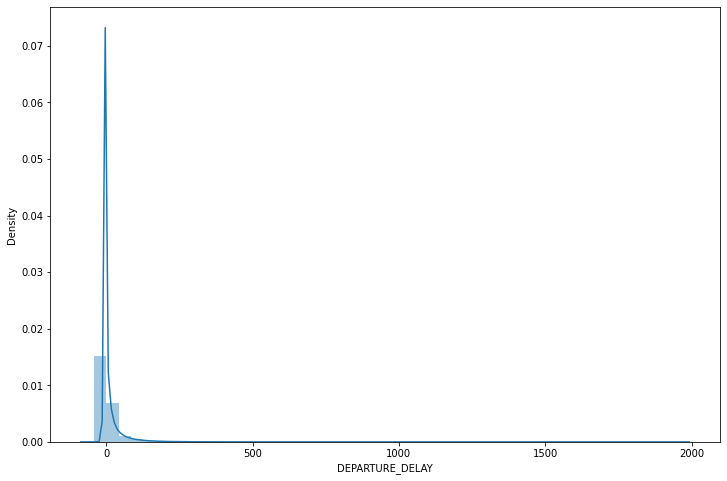

In [27]:
plt.figure(figsize=(12,8))
sns.distplot(df1['DEPARTURE_DELAY'])

<AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='Density'>

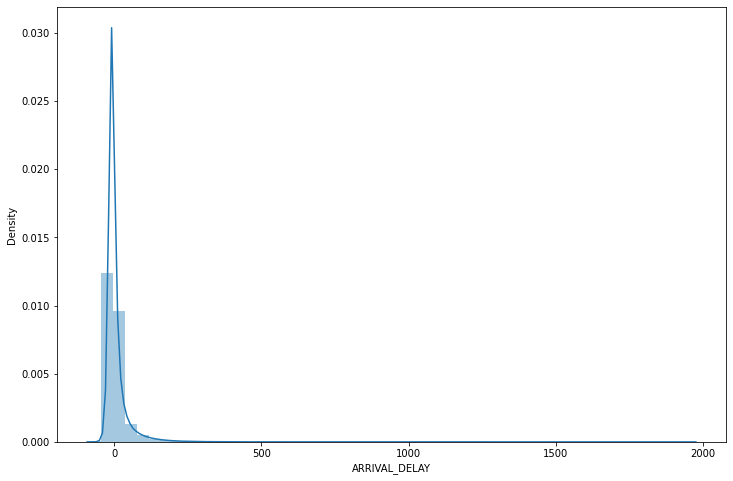

In [51]:
plt.figure(figsize=(12,8))
sns.distplot(df1['ARRIVAL_DELAY'])

In [28]:
df1=df1.dropna()

In [29]:
#Splitting the features in X and target in Y variables
X=df1.drop(['DEPARTURE_DELAY'],axis=1)
y=df1.DEPARTURE_DELAY

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit_transform(X) #scaling to (0,1)
scal_X=pd.DataFrame(scaler,columns=X.columns)

# print scaled dataset
X=scal_X

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as r2

#80% is training 20%is testing
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=9)

R2

Let us take a naive approach by taking an average of all the points by thinking of a horizontal line through them. Then we can calculate the MSE for this simple model. R2 score answers the question that if this simple model has a larger error than the linear regression model. However, it terms of metrics the answer we need is how much larger. The R2 score answers this question. R2 score is 1 — (Error from Linear Regression Model/Simple average model).
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0.

MASE
https://en.wikipedia.org/wiki/Mean_absolute_scaled_error

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [53]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=0)

In [54]:
pred = reg.predict(X_test)

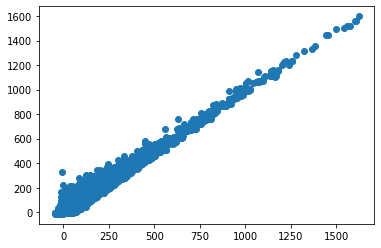

In [55]:
plt.scatter(Y_test,pred)

In [57]:
reg.score(X_test, Y_test)

0.9326663752015176

In [59]:
print("MAE : % f" %(MAE(Y_test, pred)))
print("MSE : % f" %(MSE(Y_test, pred)))
print("RMSE : % f" %(np.sqrt(MSE(Y_test, pred))))
print("R2 : % f" %r2(Y_test, pred))

MAE :  5.945745
MSE :  92.224346
RMSE :  9.603351
R2 :  0.932666


MAE :  8.467204
MSE :  144.828500
RMSE :  12.034471
R2 :  0.894260


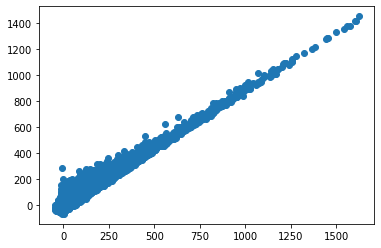

In [32]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,Y_train)
pred = regr.predict(X_test)

plt.scatter(Y_test,pred)

print("MAE : % f" %(MAE(Y_test, pred)))
print("MSE : % f" %(MSE(Y_test, pred)))
print("RMSE : % f" %(np.sqrt(MSE(Y_test, pred))))
print("R2 : % f" %r2(Y_test, pred))

MAE :  6.800837
MSE :  270.227390
RMSE :  16.438595
R2 :  0.802705


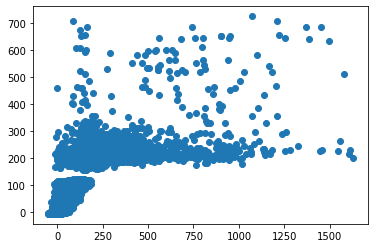

In [33]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)

xgb_r.fit(X_train,Y_train)
pred = xgb_r.predict(X_test)

plt.scatter(Y_test,pred)

print("MAE : % f" %(MAE(Y_test, pred)))
print("MSE : % f" %(MSE(Y_test, pred)))
print("RMSE : % f" %(np.sqrt(MSE(Y_test, pred))))
print("R2 : % f" %r2(Y_test, pred))

MAE :  8.636425
MSE :  292.621221
RMSE :  17.106175
R2 :  0.786355


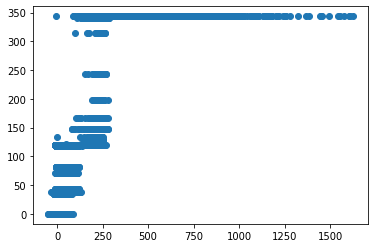

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=2, random_state=0)

rf_reg.fit(X_train,Y_train)
pred = rf_reg.predict(X_test)

plt.scatter(Y_test,pred)

print("MAE : % f" %(MAE(Y_test, pred)))
print("MSE : % f" %(MSE(Y_test, pred)))
print("RMSE : % f" %(np.sqrt(MSE(Y_test, pred))))
print("R2 : % f" %r2(Y_test, pred))

MAE :  18.637685
MSE :  1365.404955
RMSE :  36.951386
R2 :  0.003109


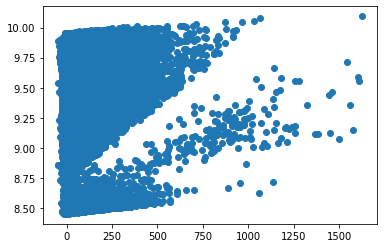

In [36]:
from sklearn.linear_model import ElasticNet
EN= ElasticNet().fit(X_train,Y_train)
pred = EN.predict(X_test)

plt.scatter(Y_test,pred)

print("MAE : % f" %(MAE(Y_test, pred)))
print("MSE : % f" %(MSE(Y_test, pred)))
print("RMSE : % f" %(np.sqrt(MSE(Y_test, pred))))
print("R2 : % f" %r2(Y_test, pred))

In [37]:
from sklearn.linear_model import SGDRegressor
from io import StringIO
import sys
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

In [38]:
fX = X.values
fy = y.values

In [39]:
sgd1 = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=0.00001, penalty=None, max_iter=1,
                   average=False, random_state=2010, verbose=1)
sgd2 = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=0.0001, penalty=None, max_iter=1,
                   average=False, random_state=2010, verbose=1)
sgd3 = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=0.001, penalty=None, max_iter=1,
                   average=False, random_state=2010, verbose=1)

In [40]:
coef_list1=[]; # this holds the coefficient values for first regressor
coef_list2=[]; # this holds the coefficient values for second regressor
coef_list3=[]; # this holds the coefficient values for third regressor
epochs = 15 ; # number of epochs

for epoch in range(epochs):
    model1 = sgd1.partial_fit(fX, fy) #create three model for each regressor
    model2 = sgd2.partial_fit(fX, fy)
    model3 = sgd3.partial_fit(fX, fy)
    y1 = model1.predict(fX)    #prediction values for each regressor
    y2 = model2.predict(fX)
    y3 = model3.predict(fX)
    coef_list1.append(model1.coef_.tolist()) #collect tolist the coefficients for each regressor
    coef_list2.append(model2.coef_.tolist())
    coef_list3.append(model3.coef_.tolist())

In [41]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue() #create value loss history to take the loss from the string
loss_list1 = []  #this list collects loss for each regressor
loss_list2 = []
loss_list3 = []
count = 1   #create count to find loss of each regressor in loss history

for line in loss_history.split('\n'):   #split to lines loss history
    if(len(line.split("loss: ")) == 1):   #split lines to 'loss: ' and when if equal character we continue 
        continue                        #if is more than 1 go to if condition and take loss values from loss history
    if count%3==1:
        loss_list1.append(float(line.split("loss: ")[-1])) #append to list the loss value after spliting of string
    elif count%3==2:                                                                          #for each regressor
        loss_list2.append(float(line.split("loss: ")[-1]))
    else:
        loss_list3.append(float(line.split("loss: ")[-1]))
    count+=1

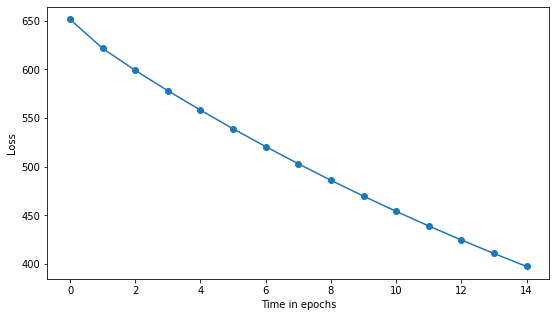

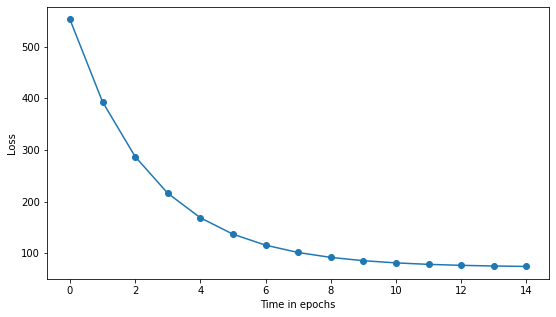

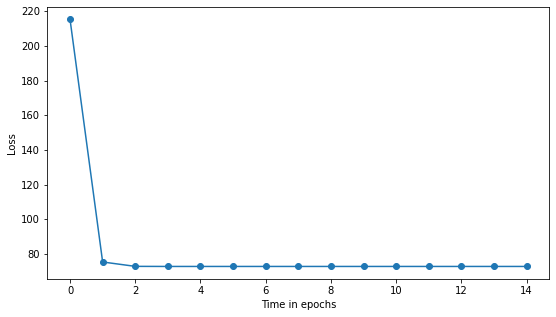

In [42]:
plt.figure(figsize=(9,5))
plt.plot(np.arange(len(loss_list1)), loss_list1)
plt.scatter(np.arange(len(loss_list1)),loss_list1)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()
plt.figure(figsize=(9,5))
plt.plot(np.arange(len(loss_list2)),loss_list2)
plt.scatter(np.arange(len(loss_list2)),loss_list2)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()
plt.figure(figsize=(9,5))
plt.plot(np.arange(len(loss_list3)),loss_list3)
plt.scatter(np.arange(len(loss_list3)),loss_list3)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

In [43]:
bikesgdr=pd.DataFrame([sgd1.coef_,sgd2.coef_,sgd3.coef_],index=['coef1','coef2','coef3'],columns=X.columns)
bikesgdr.transpose()

,coef1,coef2,coef3
DAY_OF_WEEK,-0.969552,0.390760,0.524396
AIRLINE,1.928912,1.090846,0.970482
ORIGIN_AIRPORT,1.865721,-0.767857,-1.002472
DESTINATION_AIRPORT,1.291707,-0.141934,-0.317062
DEPARTURE_TIME,33.739313,7.902163,5.758521
ARRIVAL_TIME,-14.588084,-3.835460,-3.389467
ARRIVAL_DELAY,473.762283,1728.569773,1816.924394


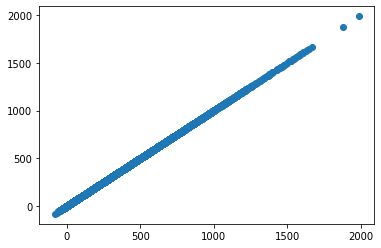

In [44]:
plt.scatter(fy, y)

-- Epoch 1
Norm: 1453.20, NNZs: 7, Bias: -59.796021, T: 4571206, Avg. loss: 246.694008
Total training time: 1.64 seconds.
MAE :  8.686081
MSE :  192.602747
RMSE :  13.878139
R2 :  0.859379


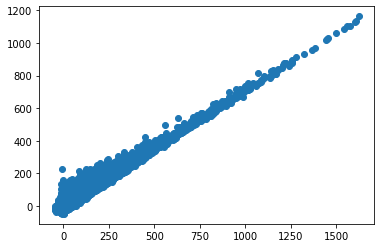

In [50]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=0.001, penalty=None, max_iter=1,
                   average=False, random_state=2010, verbose=1)

sgd.fit(X_train,Y_train)
pred = sgd.predict(X_test)

plt.scatter(Y_test,pred)

print("MAE : % f" %(MAE(Y_test, pred)))
print("MSE : % f" %(MSE(Y_test, pred)))
print("RMSE : % f" %(np.sqrt(MSE(Y_test, pred))))
print("R2 : % f" %r2(Y_test, pred))

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,5819079.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5819079.0,6.524085,3.405137,1.0,4.0,7.0,9.0,12.0
DAY,5819079.0,15.704594,8.783425,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5819079.0,3.926941,1.988845,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5819079.0,2173.092742,1757.063999,1.0,730.0,1690.0,3230.0,9855.0
SCHEDULED_DEPARTURE,5819079.0,1329.602470,483.751821,1.0,917.0,1325.0,1730.0,2359.0
DEPARTURE_TIME,5732926.0,1335.204439,496.423260,1.0,921.0,1330.0,1740.0,2400.0
DEPARTURE_DELAY,5732926.0,9.370158,37.080942,-82.0,-5.0,-2.0,7.0,1988.0
TAXI_OUT,5730032.0,16.071662,8.895574,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,5730032.0,1357.170841,498.009356,1.0,935.0,1343.0,1754.0,2400.0


In [47]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
DAY_OF_WEEK,5714008.0,3.932643,1.985967,1.0,2.0,4.0,6.0,7.0
AIRLINE,5714008.0,6.754759,4.640073,0.0,3.0,7.0,11.0,13.0
ORIGIN_AIRPORT,5714008.0,440.182207,123.613161,0.0,372.0,468.0,534.0,627.0
DESTINATION_AIRPORT,5714008.0,441.206902,123.651365,0.0,373.0,469.0,535.0,628.0
DEPARTURE_TIME,5714008.0,1335.065627,496.419817,1.0,921.0,1330.0,1740.0,2400.0
DEPARTURE_DELAY,5714008.0,9.294842,36.889724,-82.0,-5.0,-2.0,7.0,1988.0
ARRIVAL_TIME,5714008.0,1476.373460,525.973017,1.0,1058.0,1512.0,1916.0,2400.0
ARRIVAL_DELAY,5714008.0,4.407057,39.271297,-87.0,-13.0,-5.0,8.0,1971.0


### Questions & Hypothesis

linear regression, logistic regression, RF_regression, XGBoost_regression, SGDRegressor, SVM_regression

Which regression algorithm can better handle scalability over time?

Which regression method achieves less RMSE in prediction?

Is the RMSE of some of the reggression algorithms correlated with the scalability?

Null Hypothesis 1: When we use more instances from our data, then some regression methods achieves less RMSE.

Null Hypothesis 2: Linear regression has equal RMSE effects with respect to scalability.

Null Hypothesis 3: RFregression and XGBoost regression has the same RMSE results with respect to scalability.

Null Hypothesis 4: All the regression methods (that we use) are equal robust with scalability.

Null Hypothesis 5: 

Σε ποιες περιπτώσεις χρήσης σχετικές με traffic management τα πάνε καλά;


Τι μέγεθος δεδομένων είναι το μέγιστο για να έχουμε π.χ. πρόβλεψη σε
εύλογο χρονικό διάστημα;